In [1]:
pip install --upgrade pip setuptools==57.5.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install regressors

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install prettytable

In [4]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
from prettytable import PrettyTable

import statsmodels.api as sm
from sklearn.linear_model import Ridge
from regressors import stats
from scipy import stats as st
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

<h3>Question 6</h3>

In [5]:
#loading data
MPIAssignment=pd.read_excel('MPIAssignment.xlsx') 

In [6]:
MPIAssignment

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,area,landscan_pop,mpi_headcount,mpi_intensity,mpi,nightlight_per_capita,population_density,log_population_density,log_MPI,mpi_predicts
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,0.000086,30758,0.064,0.412,0.027,0.003293,3.556028e+08,19.689325,-3.611918,-3.651187
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,0.001903,19802,0.282,0.445,0.126,0.004296,1.040623e+07,16.157915,-2.071473,-2.100568
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,0.002370,26452,0.212,0.434,0.092,0.005065,1.116131e+07,16.227964,-2.385967,-2.150950
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,0.000277,62266,0.081,0.409,0.033,0.002601,2.249614e+08,19.231439,-3.411248,-3.429691
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,0.004290,23144,0.369,0.430,0.159,0.002135,5.394657e+06,15.500919,-1.838851,-1.753770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,411,5,Eastern Province,57,Bugesera,5711,Nyarugenge,5.189044,0.003702,23007,0.536,0.459,0.246,0.000226,6.214744e+06,15.642435,-1.402424,-1.769457
412,412,5,Eastern Province,57,Bugesera,5712,Rilima,13.912351,0.006574,32334,0.331,0.429,0.142,0.000430,4.918729e+06,15.408561,-1.951928,-1.670202
413,413,5,Eastern Province,57,Bugesera,5713,Ruhuha,8.912983,0.003581,24332,0.438,0.448,0.196,0.000366,6.794923e+06,15.731686,-1.629641,-1.812773
414,414,5,Eastern Province,57,Bugesera,5714,Rweru,18.714766,0.017524,30867,0.519,0.487,0.253,0.000606,1.761416e+06,14.381629,-1.374366,-1.216415


In [7]:
variables=['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity','mpi']
variables

['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity', 'mpi']

In [8]:

#plotting subplot for each variable

def hist_plot(vals):
    row =len(vals)
    fig, axs = plt.subplots(row,1 ,figsize=(8,20))

    for i in range (len(vals)):


        axs[i].hist(MPIAssignment[vals[i]],bins=25)

        axs[i].set_title(vals[i])
        axs[i].set_xlabel("Values")
        axs[i].set_ylabel('Frequency')



    fig.tight_layout()
    plt.show()

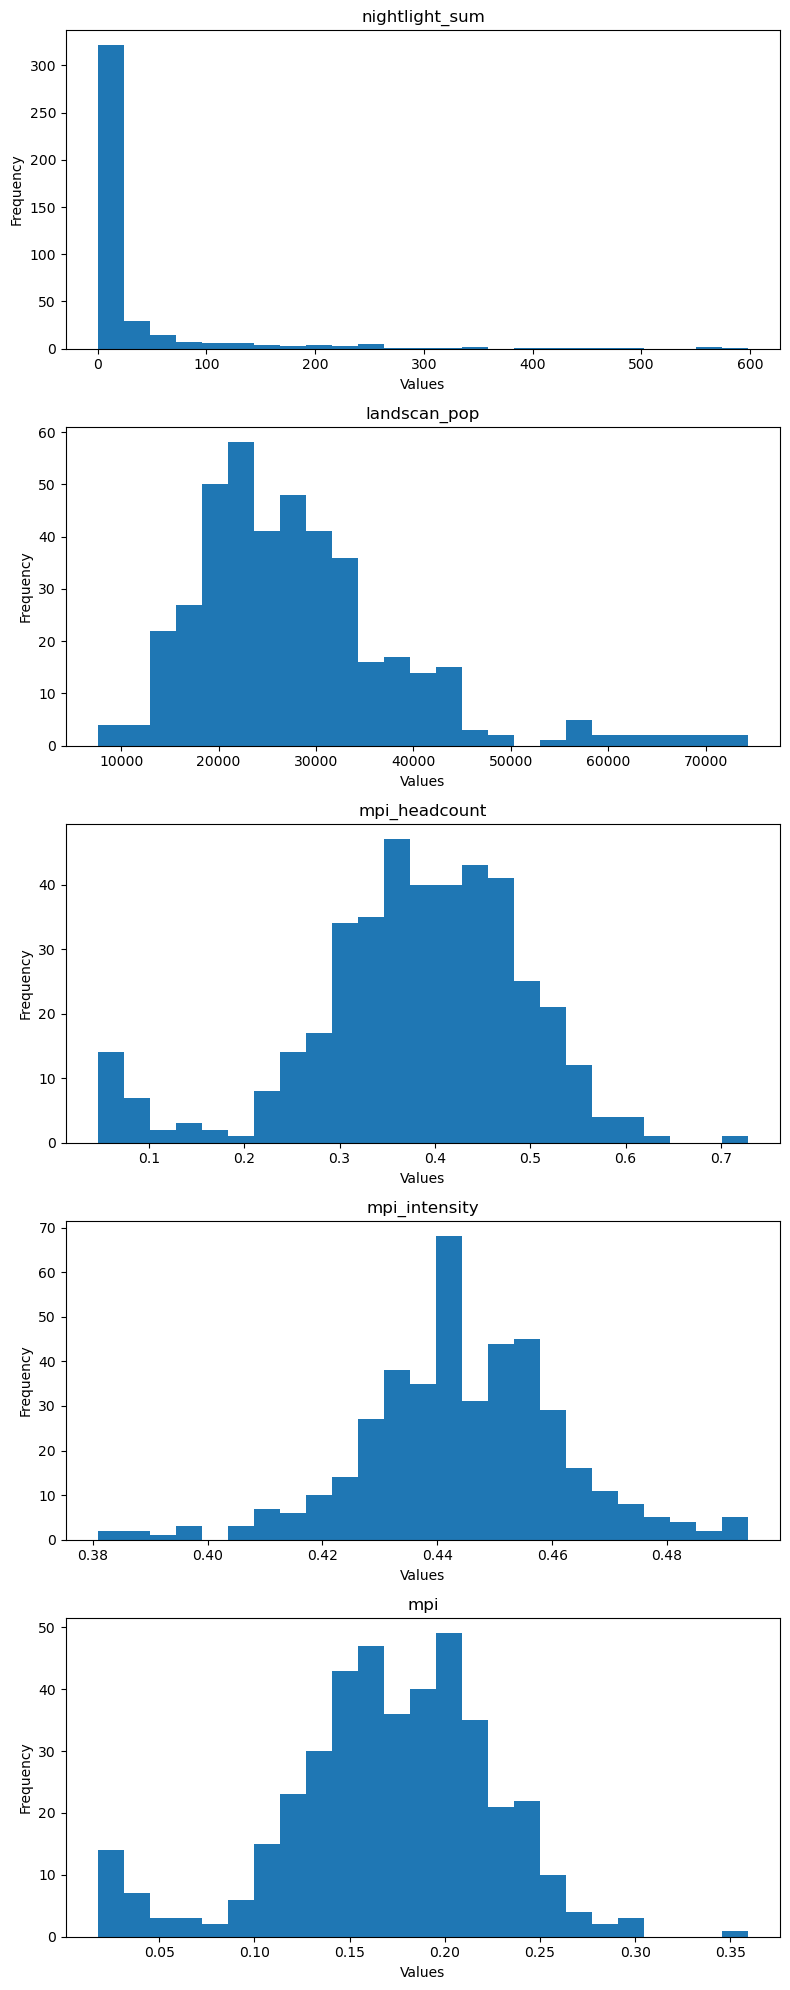

In [9]:
#calling the function
hist_plot(variables)

In [10]:
#computing dependent variable
dep_var=MPIAssignment['mpi']

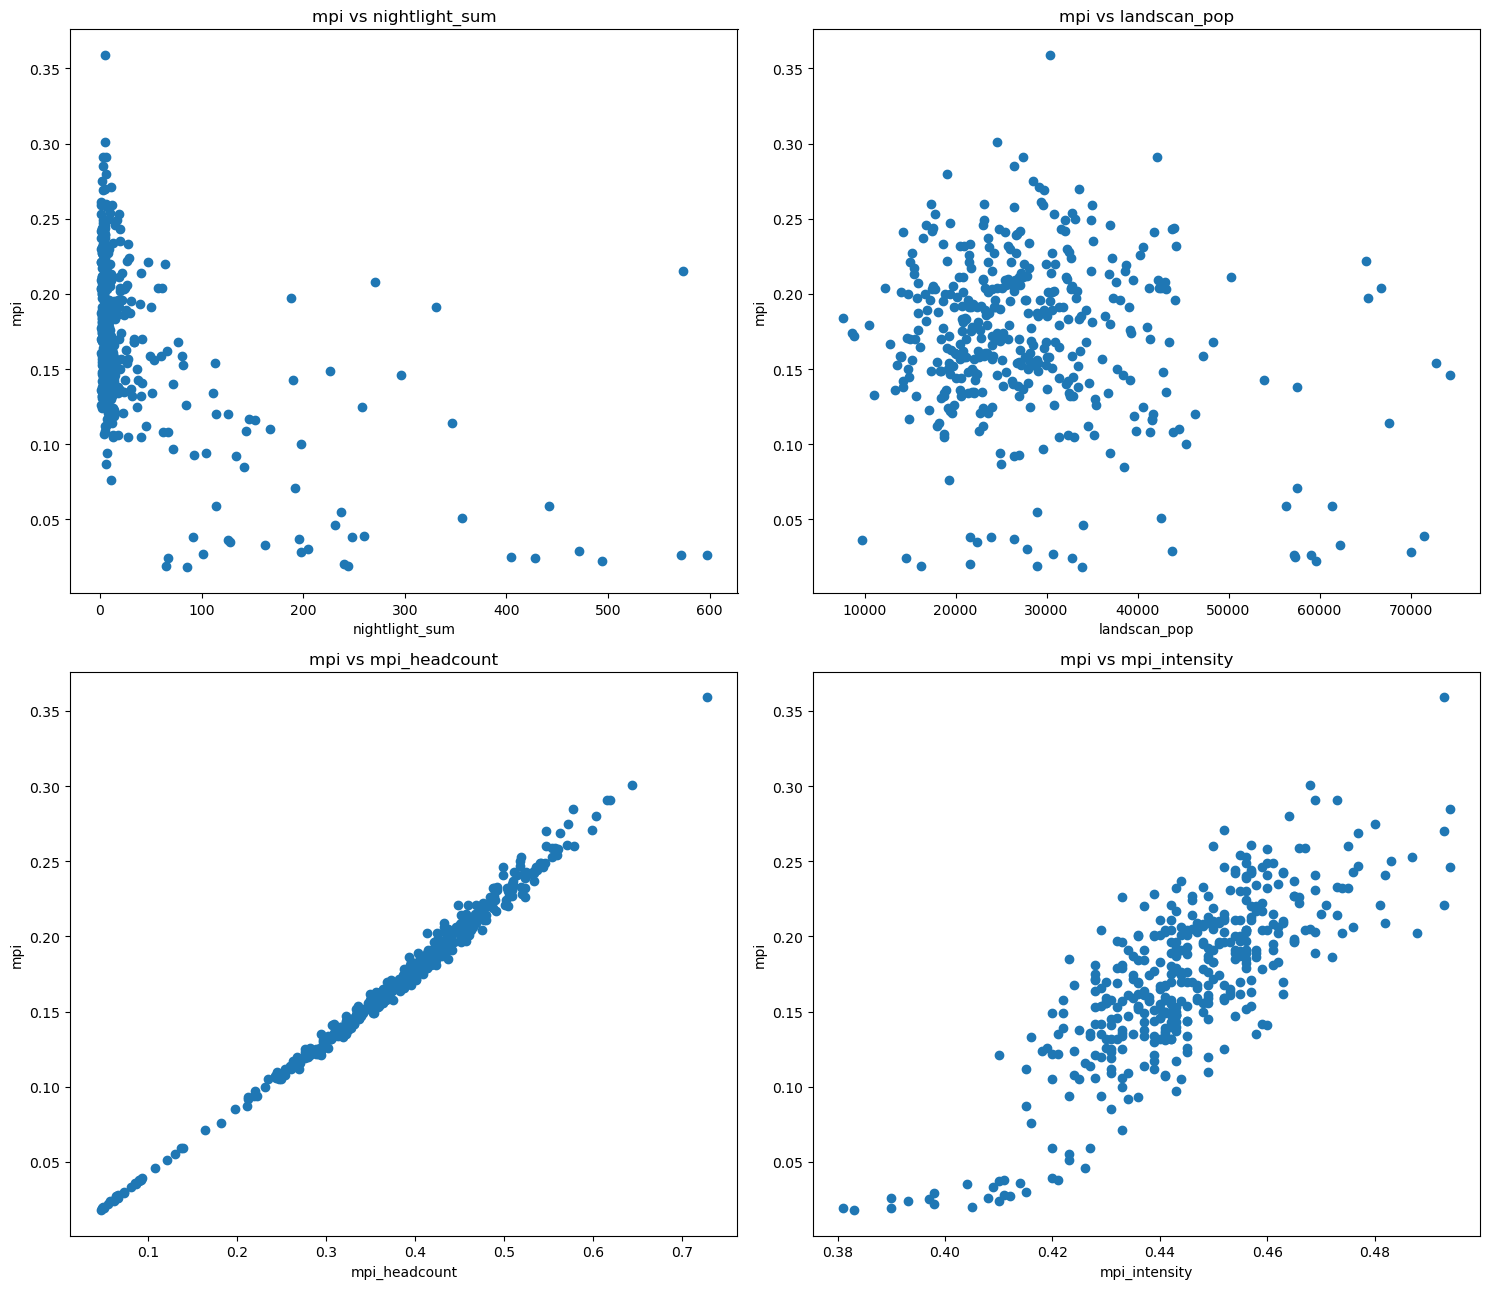

In [11]:
#plotting scatter plots
fig, axs = plt.subplots(2,2 ,figsize=(15,13))
for i in range (len(variables)-1):
    
    row=int(i/2)
    col=i%2


    
    axs[row,col].scatter(MPIAssignment[variables[i]],dep_var )
    
    axs[row,col].set_title(f"mpi vs {variables[i]}")
    axs[row,col].set_xlabel(f"{variables[i]}")
    axs[row,col].set_ylabel(f'mpi')
    



fig.tight_layout()
plt.show()

In [12]:
#computing correlation of X Vs Y
def corxy(vals):
    
    cor_xY={}
    for i in range (len(vals)-1):

        cor= MPIAssignment[vals[i]].corr(dep_var)
        cor_xY[f'{vals[i]} vs mpi']=cor
        
    return cor_xY
    


In [13]:
cor_xY=corxy(variables)
cor_xY

{'nightlight_sum vs mpi': -0.5283488215627704,
 'landscan_pop vs mpi': -0.17278184955090173,
 'mpi_headcount vs mpi': 0.9953781778518253,
 'mpi_intensity vs mpi': 0.7998831131635528}

In [14]:
#computing correlation of log(X) Vs Y
def cor_logxy(vals):
    
    cor_logxY ={}
    for i in range (len(vals)-1):

        cor= np.log(MPIAssignment[vals[i]]).corr(dep_var)
        cor_logxY[f'log_{vals[i]} vs mpi']=cor
        
    return cor_logxY

In [15]:
cor_logxY=cor_logxy(variables)
cor_logxY

{'log_nightlight_sum vs mpi': -0.5758158012690008,
 'log_landscan_pop vs mpi': -0.113587148729851,
 'log_mpi_headcount vs mpi': 0.922130693271593,
 'log_mpi_intensity vs mpi': 0.8034733734916467}

In [16]:
#computing correlation of X Vs log(Y)
def cor_Xlogy(vals):
    cor_X_logy ={}
    for i in range (len(vals)-1):

        cor= MPIAssignment[vals[i]].corr(np.log(dep_var))
        cor_X_logy[f'{vals[i]} vs log_mpi']=cor
    return cor_X_logy

In [17]:
cor_X_logy=cor_Xlogy(variables)
cor_X_logy

{'nightlight_sum vs log_mpi': -0.6389269687490735,
 'landscan_pop vs log_mpi': -0.2233421338720428,
 'mpi_headcount vs log_mpi': 0.9422003792915737,
 'mpi_intensity vs log_mpi': 0.7691127308364137}

In [18]:
#computing correlation of log(X) Vs log(Y)

def cor_logx_logy(vals):
    cor_logX_logy ={}
    for i in range (len(vals)-1):

        cor= np.log(MPIAssignment[vals[i]]).corr(np.log(dep_var))
        cor_logX_logy[f'log_{vals[i]} vs log_mpi']=cor
        
    return cor_logX_logy

In [19]:
cor_logX_logy=cor_logx_logy(variables)
cor_logX_logy

{'log_nightlight_sum vs log_mpi': -0.6170780029712375,
 'log_landscan_pop vs log_mpi': -0.16011031369824708,
 'log_mpi_headcount vs log_mpi': 0.9985073413337329,
 'log_mpi_intensity vs log_mpi': 0.7818760495665169}

In [20]:

# create a table object
table = PrettyTable()

def tble(vals):
    
    #setting the size of the rows of the table
    size=len(vals)-1

    # add columns to the table
    table.add_column("Features", [vals[i] for i in range(len(vals)-1)])
    table.add_column("X vs Y", [list(cor_xY.values())[i] for i in range (size)])
    table.add_column('log X vs y', [list(cor_logxY.values())[i] for i in range (size)])
    table.add_column('X vs log y', [list(cor_X_logy.values())[i] for i in range (size)])
    table.add_column('log x vs log y', [list(cor_logX_logy.values())[i] for i in range (size)])

    # print the table
    print(table)


In [21]:
tble(variables)

+----------------+----------------------+---------------------+---------------------+----------------------+
|    Features    |        X vs Y        |      log X vs y     |      X vs log y     |    log x vs log y    |
+----------------+----------------------+---------------------+---------------------+----------------------+
| nightlight_sum | -0.5283488215627704  | -0.5758158012690008 | -0.6389269687490735 | -0.6170780029712375  |
|  landscan_pop  | -0.17278184955090173 |  -0.113587148729851 | -0.2233421338720428 | -0.16011031369824708 |
| mpi_headcount  |  0.9953781778518253  |  0.922130693271593  |  0.9422003792915737 |  0.9985073413337329  |
| mpi_intensity  |  0.7998831131635528  |  0.8034733734916467 |  0.7691127308364137 |  0.7818760495665169  |
+----------------+----------------------+---------------------+---------------------+----------------------+


<h3>Question 7</h3>

In [22]:
#creating new features
MPIAssignment['nightlight_per_capita']=MPIAssignment['nightlight_sum']/MPIAssignment['landscan_pop']
MPIAssignment['population_density']=MPIAssignment['landscan_pop']/MPIAssignment['area']


In [23]:
variables3=['nightlight_per_capita','population_density','mpi']

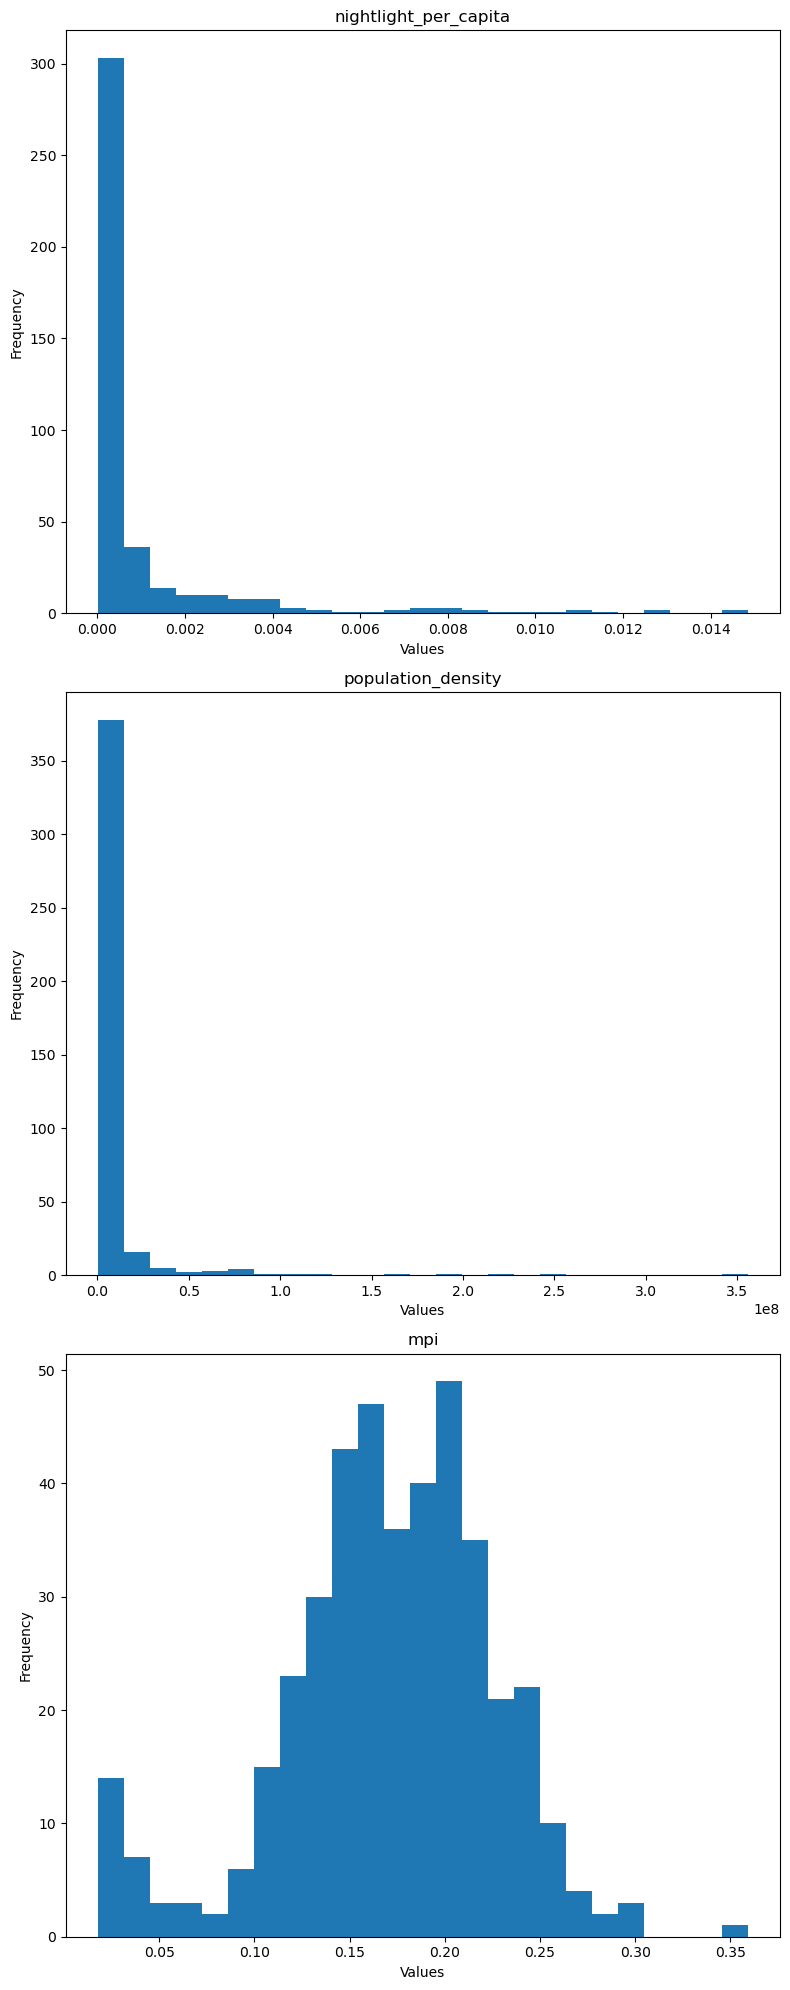

In [24]:
hist_plot(variables3)

In [25]:
#computing correlations with the dependnet variable
cor_xY=corxy(variables3)
cor_xY

{'nightlight_per_capita vs mpi': -0.5469780078498991,
 'population_density vs mpi': -0.48713563641537966}

In [26]:
cor_logxY=cor_logxy(variables3)
cor_logxY

{'log_nightlight_per_capita vs mpi': -0.6053583063186241,
 'log_population_density vs mpi': -0.6174372888367271}

In [27]:
cor_X_logy=cor_Xlogy(variables3)
cor_X_logy

{'nightlight_per_capita vs log_mpi': -0.6604966836916588,
 'population_density vs log_mpi': -0.6682808064591083}

In [28]:
cor_logX_logy=cor_logx_logy(variables3)
cor_logX_logy

{'log_nightlight_per_capita vs log_mpi': -0.6383042350797379,
 'log_population_density vs log_mpi': -0.7453312898008179}

In [29]:
# create a table object
table = PrettyTable()

In [30]:
#calling the function to compute the correlation of new features
tble(variables3)

+-----------------------+----------------------+---------------------+---------------------+---------------------+
|        Features       |        X vs Y        |      log X vs y     |      X vs log y     |    log x vs log y   |
+-----------------------+----------------------+---------------------+---------------------+---------------------+
| nightlight_per_capita | -0.5469780078498991  | -0.6053583063186241 | -0.6604966836916588 | -0.6383042350797379 |
|   population_density  | -0.48713563641537966 | -0.6174372888367271 | -0.6682808064591083 | -0.7453312898008179 |
+-----------------------+----------------------+---------------------+---------------------+---------------------+


<p>Depending on the above table, the transformed dependent variable (log y) yield higher correlations with the independnet variables.</p> <strong> nightlight_per_capita and transformed population_density (log x) </strong> have higher correlations with the dependnet variable 

<h3>Question 8</h3>

In [31]:
#building new feature with higher correlationS
MPIAssignment['log_population_density']=np.log(MPIAssignment['population_density'])
MPIAssignment['log_MPI']=np.log(MPIAssignment['mpi'])

In [32]:
MPIAssignment

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,area,landscan_pop,mpi_headcount,mpi_intensity,mpi,nightlight_per_capita,population_density,log_population_density,log_MPI,mpi_predicts
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,0.000086,30758,0.064,0.412,0.027,0.003293,3.556028e+08,19.689325,-3.611918,-3.651187
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,0.001903,19802,0.282,0.445,0.126,0.004296,1.040623e+07,16.157915,-2.071473,-2.100568
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,0.002370,26452,0.212,0.434,0.092,0.005065,1.116131e+07,16.227964,-2.385967,-2.150950
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,0.000277,62266,0.081,0.409,0.033,0.002601,2.249614e+08,19.231439,-3.411248,-3.429691
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,0.004290,23144,0.369,0.430,0.159,0.002135,5.394657e+06,15.500919,-1.838851,-1.753770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,411,5,Eastern Province,57,Bugesera,5711,Nyarugenge,5.189044,0.003702,23007,0.536,0.459,0.246,0.000226,6.214744e+06,15.642435,-1.402424,-1.769457
412,412,5,Eastern Province,57,Bugesera,5712,Rilima,13.912351,0.006574,32334,0.331,0.429,0.142,0.000430,4.918729e+06,15.408561,-1.951928,-1.670202
413,413,5,Eastern Province,57,Bugesera,5713,Ruhuha,8.912983,0.003581,24332,0.438,0.448,0.196,0.000366,6.794923e+06,15.731686,-1.629641,-1.812773
414,414,5,Eastern Province,57,Bugesera,5714,Rweru,18.714766,0.017524,30867,0.519,0.487,0.253,0.000606,1.761416e+06,14.381629,-1.374366,-1.216415


In [33]:
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        print(f'\tP_values of the features using OLS:\n\n')
        print(f'{pvalues}')
        if not changed:
            break
    return included

In [34]:
#retriving x and y feature 
X_features=MPIAssignment[['log_population_density' ,'nightlight_per_capita']]
y_feature=MPIAssignment['log_MPI']

In [35]:
#computing p_values
features=backward_regression(X_features,y_feature,0.05,True)

	P_values of the features using OLS:


log_population_density    3.531911e-59
nightlight_per_capita     8.738206e-38
dtype: float64


In [36]:
#computing preditions of OLS model

model = sm.OLS(y_feature, sm.add_constant(X_features)).fit()

ols_predicts=model.predict(sm.add_constant(X_features))

In [37]:
#computing p_value of the OLS model
print(f'The p_value of the OLS model: {st.ttest_ind(y_feature, ols_predicts)[1]}')

The p_value of the OLS model: 0.9999999999999043


In [38]:
#building ridge regression model
ridge_model=Ridge(0.01)

#fitting the model
ridge_model.fit(X_features,y_feature)

Ridge(alpha=0.01)

In [39]:
#computing p_values for features used for ridge regression 
p_values=stats.coef_pval(ridge_model, X_features,y_feature)
print(f'\tP_values of the features using Ridge regression:\n')
print(f'log_population_density: {p_values[1]}')
print(f'nightlight_per_capita: {p_values[2]}')


	P_values of the features using Ridge regression:

log_population_density: 0.0
nightlight_per_capita: 0.06963202397219326


In [40]:
p_values

array([0.        , 0.        , 0.06963202])

In [41]:
#computing predictions
ridge_predict=ridge_model.predict(X_features)

In [42]:
#computing p_value of the Ridge regression model
print(f'The p_value of the Ridge regression model: {st.ttest_ind(y_feature, ridge_predict)[1]}')

The p_value of the Ridge regression model: 0.9999999999999941


In [43]:
#building elastic net model
ela_model=ElasticNet(random_state=42)

#fitting the model
ela_model.fit(X_features,y_feature)

ElasticNet(random_state=42)

In [44]:
#computing p_values for features used for elastic net 
p_values=stats.coef_pval(ela_model, X_features,y_feature)
print(f'\tP_values of the features using elastic net:\n')
print(f'log_population_density: {p_values[1]}')
print(f'nightlight_per_capita: {p_values[2]}')

	P_values of the features using elastic net:

log_population_density: 1.0
nightlight_per_capita: 1.0


In [45]:
#computing predictions
ela_predict=ela_model.predict(X_features)

In [46]:
#computing p_value of the elastic net model
print(f'P value of the model {st.ttest_ind(y_feature, ela_predict)[1]}')

P value of the model 0.9999999999999927


C:\Users\User\AppData\Local\Temp\ipykernel_22924\2682180381.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f'P value of the model {st.ttest_ind(y_feature, ela_predict)[1]}')


<h3>Question 9 </h3>

In [47]:
#constructing LassoCV
Lasso_reg = LassoCV(cv=10, random_state=42).fit(X_features,y_feature)

#Computing predicitons
lasso_predict=Lasso_reg.predict(X_features)

In [48]:
st.ttest_ind(y_feature, y_feature)[1]

1.0

In [49]:
#computing correlation between yhat and log mpi
corre = np.corrcoef(lasso_predict, y_feature)

print(f'Correlation between  log yhat to log y: {corre[0,1]}')

Correlation between  log yhat to log y: 0.7908907455047517


In [50]:
#computing r squared
r2_squared=r2_score(y_feature,lasso_predict)
print(f'R sqaured of the model is: {r2_squared}')

R sqaured of the model is: 0.6239741752433756


<h3>Question 10</h3>

In [51]:
#adding the estimated mpi to the dataframe
MPIAssignment['mpi_predicts']=lasso_predict

In [52]:
#exporting the dataframe to excel
MPIAssignment.to_excel('MPIAssignment.xlsx', index=False)